# Importing necessary libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
#write a code to upload a file from my computer
from google.colab import files
uploaded = files.upload()

Saving heart_disease_uci.csv to heart_disease_uci.csv


# Step 1: Load the dataset
# Upload the 'heart_disease_uci.csv' file to your Colab environment first.

In [20]:
# Step 1: Load the dataset
import pandas as pd

# Load your dataset (assuming the file name is 'heart_disease_uci.csv' and it's uploaded in Colab)
df = pd.read_csv('/content/heart_disease_uci.csv')

# Display the first few rows of the dataset to verify successful loading
print(df.head())

# Check for any missing values in the dataset
print(df.isnull().sum())


   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
id      

# Step 2: Data Understanding and Preprocessing
# Basic info and check for missing values

In [21]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs         

In [22]:
# Encode categorical variables if present
df = pd.get_dummies(df, drop_first=True)
# Separate features and target variable
X = df.drop('num', axis=1)
y = df['num']


# Step 3: Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd

# Step 1: Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Step 2: Handle missing values by imputing (mean imputation)
imputer = SimpleImputer(strategy='mean')

# Apply imputation to all the columns with missing values
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

# Split the data into features (X) and target (y)
# Assuming 'num' is the target column (indicating the presence of heart disease)
X = df_imputed.drop(columns=['num'])  # Features
y = df_imputed['num']  # Target

# Now split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the train and test sets
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (736, 22)
Test set size: (184, 22)


In [24]:
from sklearn.preprocessing import StandardScaler

# Step 3: Scale the data
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shape of the scaled data to ensure everything is correct
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train_scaled shape: (736, 22)
X_test_scaled shape: (184, 22)


# Step 4: Baseline Model - Logistic Regression

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.88      0.77        75
         1.0       0.49      0.56      0.52        54
         2.0       0.25      0.08      0.12        25
         3.0       0.29      0.19      0.23        26
         4.0       0.00      0.00      0.00         4

    accuracy                           0.56       184
   macro avg       0.34      0.34      0.33       184
weighted avg       0.50      0.56      0.52       184

ROC-AUC Score (Logistic Regression - Multi-Class): 0.83


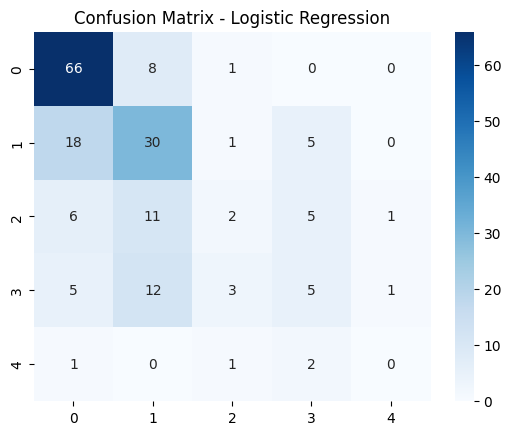

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 4: Train the logistic regression model
logreg = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence
logreg.fit(X_train_scaled, y_train)

# Step 5: Make predictions on the test set
y_pred_logreg = logreg.predict(X_test_scaled)

# Step 6: Evaluate the model
# Classification report
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Compute and print the ROC-AUC score for multi-class classification
roc_auc_logreg = roc_auc_score(y_test, logreg.predict_proba(X_test_scaled), multi_class='ovr')
print(f"ROC-AUC Score (Logistic Regression - Multi-Class): {roc_auc_logreg:.2f}")


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV

# Step 5: Define the hyperparameters grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear']   # Solver for 'l1' or 'l2' regularization
}

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Set up the GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_logreg = grid_search.best_estimator_

# Make predictions on the test set
y_pred_best_logreg = best_logreg.predict(X_test_scaled)

# Evaluate the tuned model
print("Tuned Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_best_logreg))

# Compute and print the ROC-AUC score for multi-class classification
roc_auc_best_logreg = roc_auc_score(y_test, best_logreg.predict_proba(X_test_scaled), multi_class='ovr')
print(f"Tuned ROC-AUC Score (Logistic Regression - Multi-Class): {roc_auc_best_logreg:.2f}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Logistic Regression - Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.92      0.75        75
         1.0       0.44      0.52      0.48        54
         2.0       0.25      0.04      0.07        25
         3.0       0.12      0.04      0.06        26
         4.0       0.00      0.00      0.00         4

    accuracy                           0.54       184
   macro avg       0.29      0.30      0.27       184
weighted avg       0.44      0.54      0.46       184

Tuned ROC-AUC Score (Logistic Regression - Multi-Class): 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predi

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Step 6: Train and evaluate Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate Random Forest
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test_scaled), multi_class='ovr')
print(f"ROC-AUC Score (Random Forest - Multi-Class): {roc_auc_rf:.2f}")

# Step 7: Train and evaluate SVM
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# Evaluate SVM
print("SVM - Classification Report:")
print(classification_report(y_test, y_pred_svm))
roc_auc_svm = roc_auc_score(y_test, svm.predict_proba(X_test_scaled), multi_class='ovr')
print(f"ROC-AUC Score (SVM - Multi-Class): {roc_auc_svm:.2f}")


Random Forest - Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.97      0.82        75
         1.0       0.62      0.56      0.59        54
         2.0       0.38      0.24      0.29        25
         3.0       0.41      0.27      0.33        26
         4.0       0.00      0.00      0.00         4

    accuracy                           0.63       184
   macro avg       0.43      0.41      0.41       184
weighted avg       0.58      0.63      0.59       184

ROC-AUC Score (Random Forest - Multi-Class): 0.82
SVM - Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.91      0.80        75
         1.0       0.46      0.56      0.50        54
         2.0       0.11      0.04      0.06        25
         3.0       0.19      0.12      0.14        26
         4.0       0.00      0.00      0.00         4

    accuracy                           0.55       184
   macro avg 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
# Step 7: Hyperparameter Tuning for SVM using GridSearchCV
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize SVM model
svm = SVC(probability=True, random_state=42)

# Set up the GridSearchCV for SVM
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)

# Perform grid search
grid_search_svm.fit(X_train_scaled, y_train)

# Get the best hyperparameters for SVM
best_params_svm = grid_search_svm.best_params_
print(f"Best Hyperparameters for SVM: {best_params_svm}")

# Train the best SVM model
best_svm = grid_search_svm.best_estimator_

# Make predictions with the best SVM model
y_pred_best_svm = best_svm.predict(X_test_scaled)

# Evaluate the tuned SVM model
print("Tuned SVM - Classification Report:")
print(classification_report(y_test, y_pred_best_svm))

# Compute and print the ROC-AUC score for the tuned SVM
roc_auc_best_svm = roc_auc_score(y_test, best_svm.predict_proba(X_test_scaled), multi_class='ovr')
print(f"Tuned ROC-AUC Score (SVM - Multi-Class): {roc_auc_best_svm:.2f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


Best Hyperparameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Tuned SVM - Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.91      0.77        75
         1.0       0.49      0.57      0.53        54
         2.0       0.17      0.04      0.06        25
         3.0       0.23      0.12      0.15        26
         4.0       0.00      0.00      0.00         4

    accuracy                           0.56       184
   macro avg       0.31      0.33      0.30       184
weighted avg       0.47      0.56      0.50       184

Tuned ROC-AUC Score (SVM - Multi-Class): 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
# Logistic Regression Model (already tuned and trained in previous steps)
y_pred_logreg = best_logreg.predict(X_test_scaled)

# Evaluate Logistic Regression
print("Tuned Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_logreg))
roc_auc_logreg = roc_auc_score(y_test, best_logreg.predict_proba(X_test_scaled), multi_class='ovr')
print(f"Tuned ROC-AUC Score (Logistic Regression - Multi-Class): {roc_auc_logreg:.2f}")

# SVM Model (tuned in the previous step)
y_pred_best_svm = best_svm.predict(X_test_scaled)

# Evaluate Tuned SVM
print("Tuned SVM - Classification Report:")
print(classification_report(y_test, y_pred_best_svm))
roc_auc_best_svm = roc_auc_score(y_test, best_svm.predict_proba(X_test_scaled), multi_class='ovr')
print(f"Tuned ROC-AUC Score (SVM - Multi-Class): {roc_auc_best_svm:.2f}")

Tuned Logistic Regression - Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.92      0.75        75
         1.0       0.44      0.52      0.48        54
         2.0       0.25      0.04      0.07        25
         3.0       0.12      0.04      0.06        26
         4.0       0.00      0.00      0.00         4

    accuracy                           0.54       184
   macro avg       0.29      0.30      0.27       184
weighted avg       0.44      0.54      0.46       184

Tuned ROC-AUC Score (Logistic Regression - Multi-Class): 0.82
Tuned SVM - Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.91      0.77        75
         1.0       0.49      0.57      0.53        54
         2.0       0.17      0.04      0.06        25
         3.0       0.23      0.12      0.15        26
         4.0       0.00      0.00      0.00         4

    accuracy                         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Gradient Boosting Classifier - Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.89      0.77        75
         1.0       0.57      0.57      0.57        54
         2.0       0.40      0.24      0.30        25
         3.0       0.46      0.23      0.31        26
         4.0       0.33      0.25      0.29         4

    accuracy                           0.60       184
   macro avg       0.49      0.44      0.45       184
weighted avg       0.57      0.60      0.57       184

ROC-AUC Score (Gradient Boosting Classifier - Multi-Class): 0.84


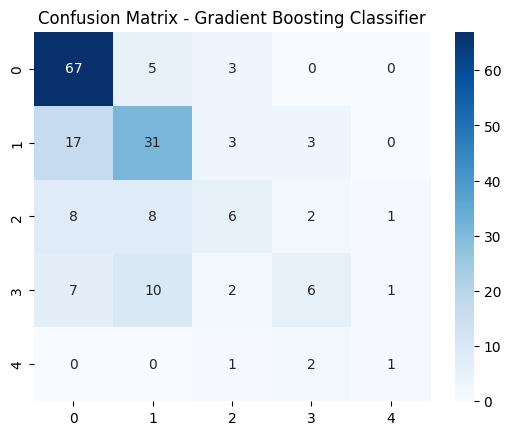

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 9: Train Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_gbc = gbc.predict(X_test_scaled)

# Evaluate Gradient Boosting Classifier
print("Gradient Boosting Classifier - Classification Report:")
print(classification_report(y_test, y_pred_gbc))

# Compute and print the ROC-AUC score for multi-class classification
roc_auc_gbc = roc_auc_score(y_test, gbc.predict_proba(X_test_scaled), multi_class='ovr')
print(f"ROC-AUC Score (Gradient Boosting Classifier - Multi-Class): {roc_auc_gbc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gbc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Gradient Boosting Classifier")
plt.show()

In [31]:
# Summary of ROC-AUC Scores for all models
roc_auc_scores = {
    'Logistic Regression': roc_auc_logreg,
    'SVM': roc_auc_best_svm,
    'Gradient Boosting Classifier': roc_auc_gbc
}

# Print ROC-AUC Scores
for model, score in roc_auc_scores.items():
    print(f"{model} ROC-AUC Score: {score:.2f}")

Logistic Regression ROC-AUC Score: 0.82
SVM ROC-AUC Score: 0.83
Gradient Boosting Classifier ROC-AUC Score: 0.84


In [32]:
import joblib

# Assuming the best model is the Gradient Boosting Classifier (replace with the chosen model)
best_model = gbc  # Or replace with the selected model (e.g., best_logreg or best_svm)

# Save the best model to a file
joblib.dump(best_model, 'best_model.pkl')

# To load the model in the future:
# best_model = joblib.load('best_model.pkl')

['best_model.pkl']